In [36]:
import pandas as pd
import json
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# import numpy as np
import statsmodels.formula.api as smf

## Loading In Data
#### Define `load_data`, `plot`, and `updated_plot` functions

In [37]:
def load_data(year):

    # year = 2022

    with open(f'sentiments_{year}.json', 'r') as file:
        data = json.load(file)

    # Create an empty DataFrame
    df = pd.DataFrame()

    # Iterate over each company in the JSON data
    for company, company_data in data.items():

        # if 'avg_positive' in company_data[year]['mda']:
        if 'avg_positive' in company_data[year]['mda'] and 'avg_negative' in company_data[year]['mda'] and 'avg_neutral' in company_data[year]['mda'] and 'avg_positive' in company_data[year]['risks'] and 'avg_negative' in company_data[year]['risks'] and 'avg_neutral' in company_data[year]['risks'] and 'stock_return' in company_data[year]:
            # Extract the desired values from the nested dictionaries
            mda_positive = company_data[year]['mda']['avg_positive']
            mda_negative = company_data[year]['mda']['avg_negative']
            mda_neutral = company_data[year]['mda']['avg_neutral']
            risk_positive = company_data[year]['risks']['avg_positive']
            risk_negative = company_data[year]['risks']['avg_negative']
            risk_neutral = company_data[year]['risks']['avg_neutral']
            stock_return = company_data[year]['stock_return']
            
            # Create a dictionary with the values
            company_dict = {
                'mda_positive': mda_positive,
                'mda_negative': mda_negative,
                'mda_neutral': mda_neutral,
                'risk_positive': risk_positive,
                'risk_negative': risk_negative,
                'risk_neutral': risk_neutral,
                'stock_return': stock_return
            }
            
            # Add the dictionary as a row to the DataFrame
            df = pd.concat([df, pd.DataFrame(company_dict, index=[company])])

    # calcualte z score
    mean_stock_return = df['stock_return'].mean()
    std_stock_return = df['stock_return'].std()
    df['z_score_stock_return'] = (df['stock_return'] - mean_stock_return) / std_stock_return

    


    # Print the DataFrame
    return df

In [38]:
df = load_data('2022')
df

,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return,z_score_stock_return
AAPL,0.922344,0.021101,0.056555,0.849809,0.020332,0.129858,-0.044337,-0.680088
CVX,0.946681,0.020833,0.032485,0.752186,0.021880,0.225935,0.013782,0.238241
BRK,0.918771,0.026647,0.054581,0.863118,0.015599,0.121283,0.027728,0.458600
ABT,0.756195,0.013546,0.230259,0.724898,0.021750,0.253352,-0.052979,-0.816636
AMZN,0.858847,0.021245,0.119908,0.837402,0.019851,0.142747,-0.135506,-2.120628
ABBV,0.819775,0.030891,0.149334,0.799627,0.031775,0.168598,0.021267,0.356498
AVGO,0.854081,0.013698,0.132221,0.858743,0.015619,0.125638,-0.009982,-0.137255
COST,0.757271,0.024414,0.218315,0.779952,0.035218,0.184830,-0.040627,-0.621467
GOOG,0.820135,0.061711,0.118153,0.820178,0.015802,0.164021,-0.128125,-2.004001
BAC,0.821909,0.027249,0.150842,0.786673,0.018113,0.195214,-0.011008,-0.153467


In [39]:
def plot(x, y):
    # Create a scatter plot
    plt.scatter(df[x], df[y], label='Data')

    # Fit a linear regression model
    model = smf.ols(formula=f'{y} ~ {x}', data=df).fit()
    
    # Get the predicted values from the model
    predicted_values = model.predict(df[x])

    # Plot the line of best fit
    plt.plot(df[x], predicted_values, color='r', label='Line of Best Fit')

    # Add labels for each point
    for i, ticker in enumerate(df.index):
        plt.annotate(ticker, (df[x].iloc[i], df[y].iloc[i]))

    # Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot: {x} vs. {y}')
    plt.legend()

    # Calculate evaluation metrics
    predicted_values = model.predict(df[x])
    r2 = model.rsquared
    adjusted_r2 = model.rsquared_adj
    mse = mean_squared_error(df[y], predicted_values)
    rmse = mean_squared_error(df[y], predicted_values, squared=False)
    mae = mean_absolute_error(df[y], predicted_values)

    # Print the evaluation metrics
    # print("R-squared:", r2)
    # print("Adjusted R-squared:", adjusted_r2)
    # print("Mean Squared Error (MSE):", mse)
    # print("Root Mean Squared Error (RMSE):", rmse)
    # print("Mean Absolute Error (MAE):", mae)
    print(model.summary())

    # Show the plot
    plt.show()

### 2022

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.046
Model:                              OLS   Adj. R-squared:                  0.010
Method:                   Least Squares   F-statistic:                     1.289
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.266
Time:                          13:44:50   Log-Likelihood:                -39.964
No. Observations:                    29   AIC:                             83.93
Df Residuals:                        27   BIC:                             86.66
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.0189     

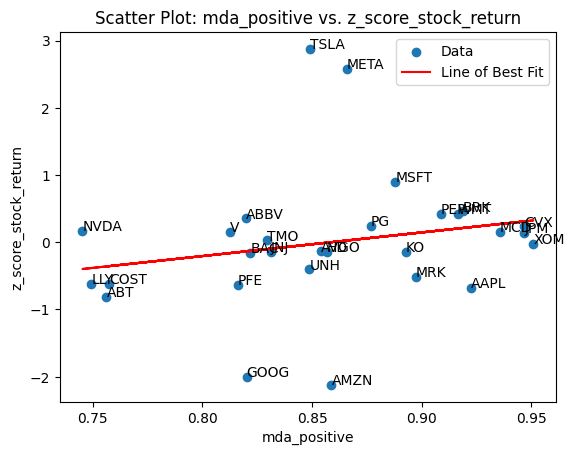

In [40]:
plot('mda_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                 -0.016
Method:                   Least Squares   F-statistic:                    0.5536
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.463
Time:                          13:44:50   Log-Likelihood:                -40.346
No. Observations:                    29   AIC:                             84.69
Df Residuals:                        27   BIC:                             87.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3358     

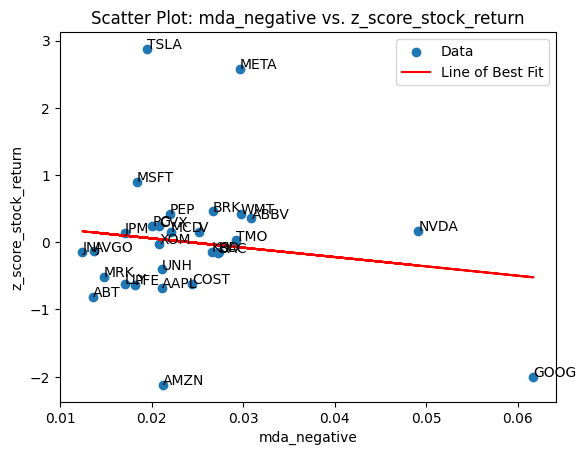

In [41]:
plot('mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.038
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.062
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.312
Time:                          13:44:50   Log-Likelihood:                -40.081
No. Observations:                    29   AIC:                             84.16
Df Residuals:                        27   BIC:                             86.90
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3860      0.

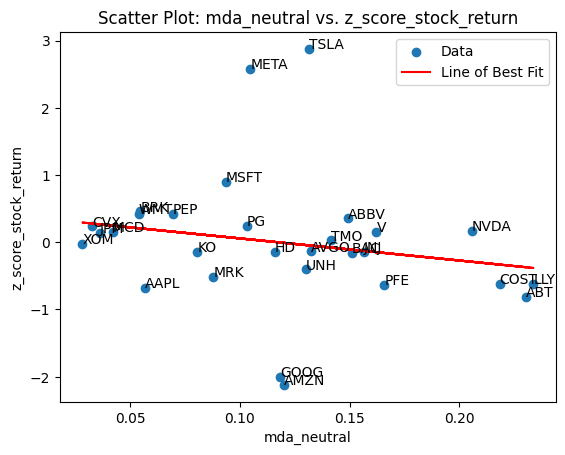

In [42]:
plot('mda_neutral', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.010
Model:                              OLS   Adj. R-squared:                 -0.027
Method:                   Least Squares   F-statistic:                    0.2628
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.612
Time:                          13:44:51   Log-Likelihood:                -40.500
No. Observations:                    29   AIC:                             85.00
Df Residuals:                        27   BIC:                             87.73
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2656  

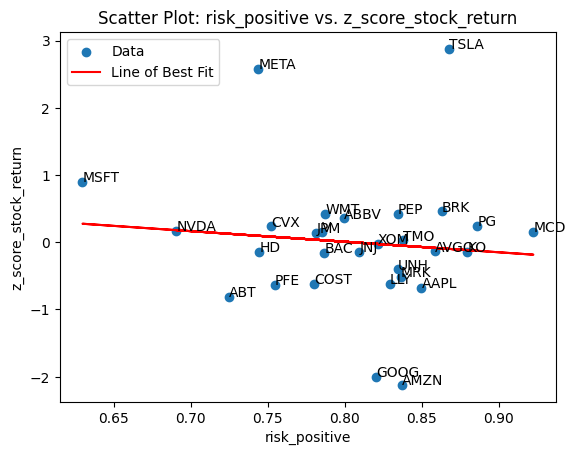

In [43]:
plot('risk_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.116
Model:                              OLS   Adj. R-squared:                  0.083
Method:                   Least Squares   F-statistic:                     3.549
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):             0.0704
Time:                          13:44:51   Log-Likelihood:                -38.850
No. Observations:                    29   AIC:                             81.70
Df Residuals:                        27   BIC:                             84.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8963  

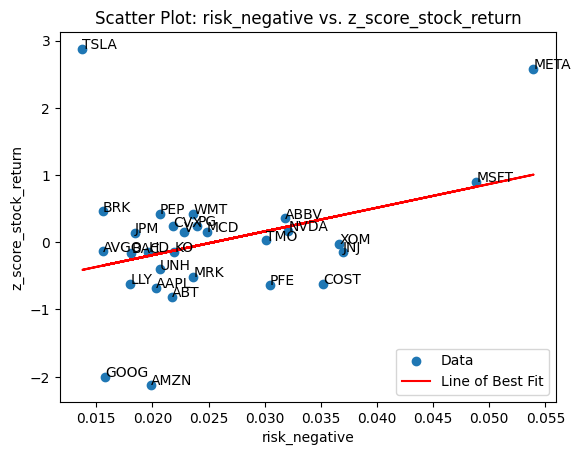

In [44]:
plot('risk_negative', 'z_score_stock_return')

In [45]:
def updated_plot(x, y):
    # Fit a linear regression model
    model = smf.ols(formula=f'{y} ~ {x}', data=df).fit()

    # Calculate evaluation metrics
    r2 = model.rsquared
    adjusted_r2 = model.rsquared_adj

    print(model.summary())

In [46]:
updated_plot('mda_positive + mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.055
Model:                              OLS   Adj. R-squared:                 -0.018
Method:                   Least Squares   F-statistic:                    0.7502
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.482
Time:                          13:44:51   Log-Likelihood:                -39.827
No. Observations:                    29   AIC:                             85.65
Df Residuals:                        26   BIC:                             89.76
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.4682     

In [47]:
updated_plot('risk_positive + risk_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.125
Model:                              OLS   Adj. R-squared:                  0.058
Method:                   Least Squares   F-statistic:                     1.862
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.176
Time:                          13:44:51   Log-Likelihood:                -38.700
No. Observations:                    29   AIC:                             83.40
Df Residuals:                        26   BIC:                             87.50
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4957  

### 2021

In [48]:
df = load_data('2021')
df

,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return,z_score_stock_return
AAPL,0.794995,0.044494,0.160511,0.756746,0.024920,0.218333,-0.008455,-0.109098
BRK,0.832410,0.031677,0.135914,0.806712,0.025650,0.167637,-0.008942,-0.115563
ABT,0.819993,0.036025,0.143982,0.810442,0.020817,0.168741,0.015177,0.204797
AMZN,0.783209,0.054936,0.161856,0.759747,0.033127,0.207126,0.104058,1.385387
ABBV,0.820824,0.032574,0.146602,0.807934,0.021732,0.170334,0.031524,0.421932
AVGO,0.816660,0.034360,0.148980,0.803896,0.027548,0.168556,0.071083,0.947391
COST,0.793029,0.042056,0.164915,0.808562,0.022060,0.169378,-0.002106,-0.024771
GOOG,0.790626,0.039841,0.169533,0.771148,0.029086,0.199765,0.025925,0.347565
MRK,0.826584,0.029644,0.143772,0.789923,0.032659,0.177418,0.058768,0.783803
MSFT,0.844567,0.035631,0.119802,0.760998,0.038571,0.200431,0.011530,0.156354


In [49]:
updated_plot('mda_positive + mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.022
Model:                              OLS   Adj. R-squared:                 -0.071
Method:                   Least Squares   F-statistic:                    0.2393
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.789
Time:                          13:44:51   Log-Likelihood:                -33.273
No. Observations:                    24   AIC:                             72.55
Df Residuals:                        21   BIC:                             76.08
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.8039     

In [50]:
updated_plot('risk_positive + risk_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.091
Method:                   Least Squares   F-statistic:                   0.04244
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.959
Time:                          13:44:51   Log-Likelihood:                -33.495
No. Observations:                    24   AIC:                             72.99
Df Residuals:                        21   BIC:                             76.52
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1190  

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.012
Model:                              OLS   Adj. R-squared:                 -0.033
Method:                   Least Squares   F-statistic:                    0.2728
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.607
Time:                          13:44:51   Log-Likelihood:                -33.396
No. Observations:                    24   AIC:                             70.79
Df Residuals:                        22   BIC:                             73.15
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.1823     

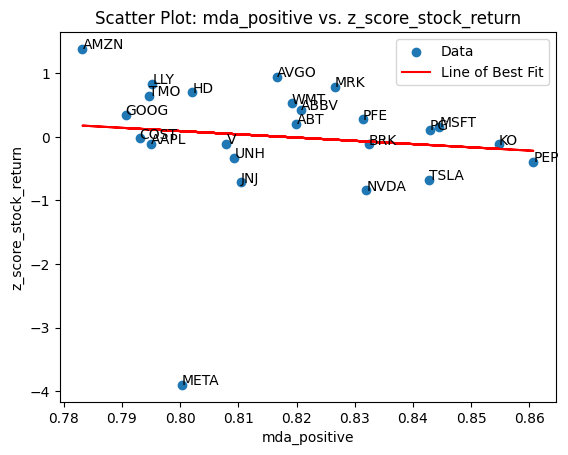

In [51]:
plot('mda_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.045
Method:                   Least Squares   F-statistic:                   0.01201
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.914
Time:                          13:44:51   Log-Likelihood:                -33.537
No. Observations:                    24   AIC:                             71.07
Df Residuals:                        22   BIC:                             73.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1348     

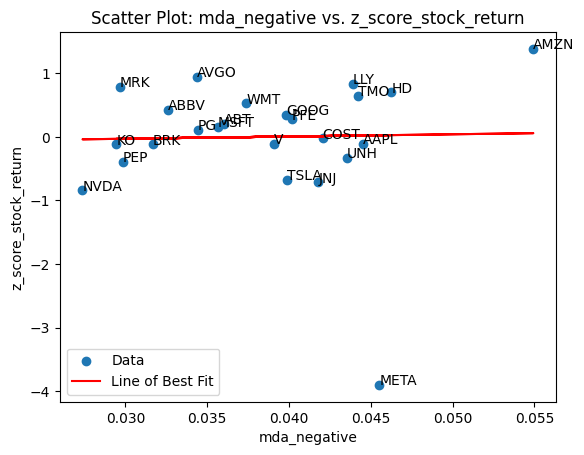

In [52]:
plot('mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.017
Model:                              OLS   Adj. R-squared:                 -0.027
Method:                   Least Squares   F-statistic:                    0.3899
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.539
Time:                          13:44:52   Log-Likelihood:                -33.333
No. Observations:                    24   AIC:                             70.67
Df Residuals:                        22   BIC:                             73.02
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1177      1.

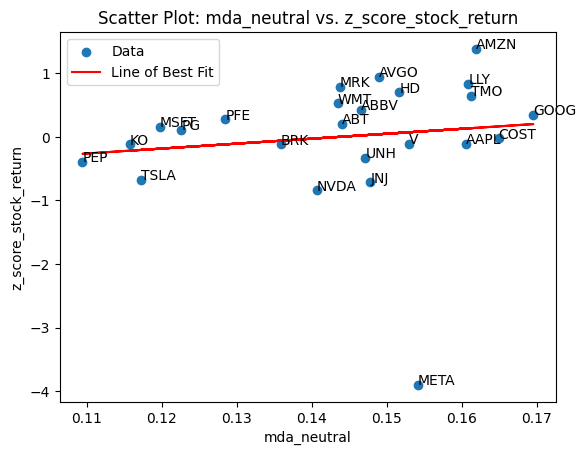

In [53]:
plot('mda_neutral', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.044
Method:                   Least Squares   F-statistic:                   0.03863
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.846
Time:                          13:44:52   Log-Likelihood:                -33.523
No. Observations:                    24   AIC:                             71.05
Df Residuals:                        22   BIC:                             73.40
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3388  

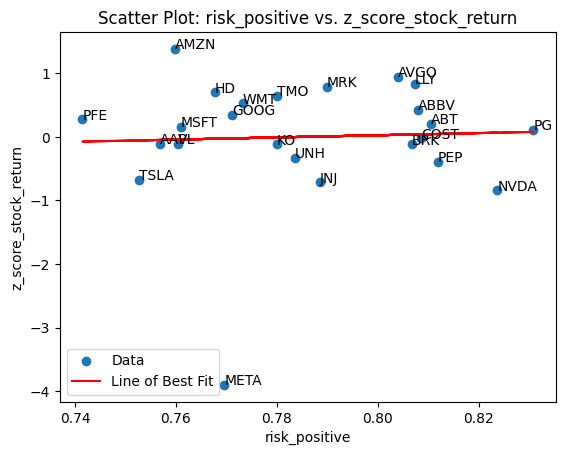

In [54]:
plot('risk_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                 -0.041
Method:                   Least Squares   F-statistic:                   0.08868
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.769
Time:                          13:44:52   Log-Likelihood:                -33.496
No. Observations:                    24   AIC:                             70.99
Df Residuals:                        22   BIC:                             73.35
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2680  

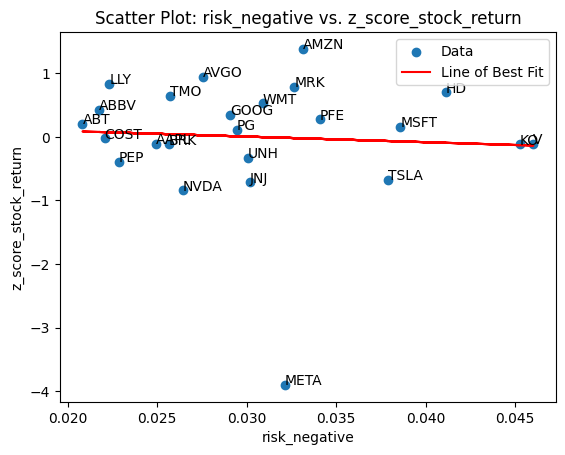

In [55]:
plot('risk_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.045
Method:                   Least Squares   F-statistic:                   0.01653
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.899
Time:                          13:44:52   Log-Likelihood:                -33.535
No. Observations:                    24   AIC:                             71.07
Df Residuals:                        22   BIC:                             73.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2418     

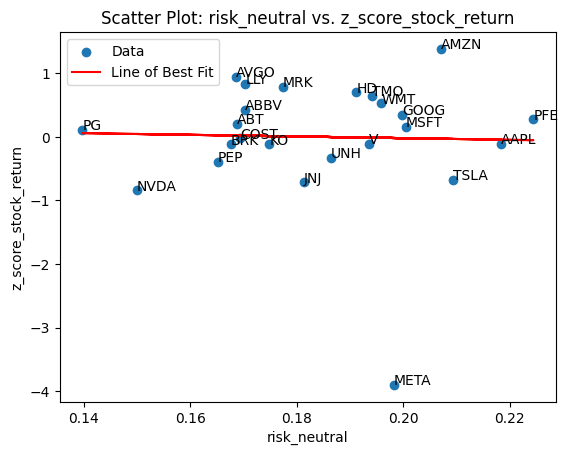

In [56]:
plot('risk_neutral', 'z_score_stock_return')

### 2020

In [57]:
df = load_data('2020')
df

,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return,z_score_stock_return
AAPL,0.854938,0.040937,0.104125,0.787338,0.025436,0.187226,0.029223,0.709163
BRK,0.838390,0.034963,0.126647,0.732931,0.033729,0.233340,0.003764,0.256355
ABT,0.816504,0.032344,0.151152,0.752130,0.019363,0.228507,-0.044893,-0.609048
AMZN,0.765203,0.061328,0.173469,0.787666,0.023735,0.188599,-0.027639,-0.302176
ABBV,0.823117,0.031952,0.144931,0.787803,0.021835,0.190362,0.015840,0.471136
AVGO,0.809260,0.046370,0.144370,0.807381,0.026568,0.166052,0.012579,0.413139
COST,0.797589,0.047565,0.154845,0.767348,0.028576,0.204077,0.055783,1.181562
GOOG,0.805927,0.038548,0.155525,0.771265,0.024941,0.203793,0.087092,1.738404
MRK,0.837088,0.028108,0.134804,0.790819,0.032505,0.176676,-0.032185,-0.383021
MSFT,0.855160,0.031509,0.113331,0.756969,0.038154,0.204877,0.042079,0.937825


In [58]:
updated_plot('mda_positive + mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.030
Model:                              OLS   Adj. R-squared:                 -0.067
Method:                   Least Squares   F-statistic:                    0.3138
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.734
Time:                          13:45:10   Log-Likelihood:                -31.769
No. Observations:                    23   AIC:                             69.54
Df Residuals:                        20   BIC:                             72.94
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.3729     

In [59]:
updated_plot('risk_positive + risk_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.186
Model:                              OLS   Adj. R-squared:                  0.104
Method:                   Least Squares   F-statistic:                     2.279
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.128
Time:                          13:45:22   Log-Likelihood:                -29.763
No. Observations:                    23   AIC:                             65.53
Df Residuals:                        20   BIC:                             68.93
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.8008  

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.030
Model:                              OLS   Adj. R-squared:                 -0.016
Method:                   Least Squares   F-statistic:                    0.6448
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.431
Time:                          13:45:39   Log-Likelihood:                -31.777
No. Observations:                    23   AIC:                             67.55
Df Residuals:                        21   BIC:                             69.82
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7709     

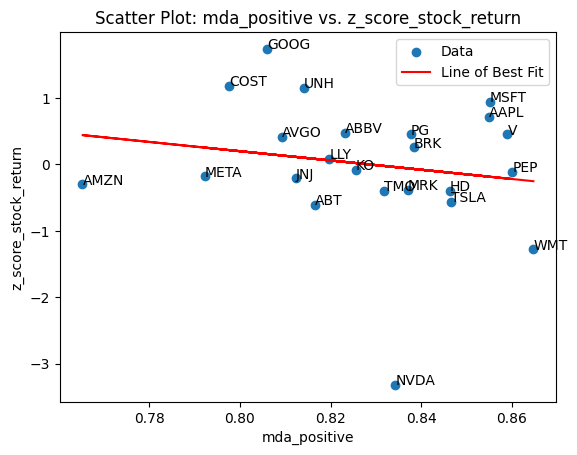

In [60]:
plot('mda_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.024
Model:                              OLS   Adj. R-squared:                 -0.022
Method:                   Least Squares   F-statistic:                    0.5198
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.479
Time:                          13:45:52   Log-Likelihood:                -31.843
No. Observations:                    23   AIC:                             67.69
Df Residuals:                        21   BIC:                             69.96
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7516     

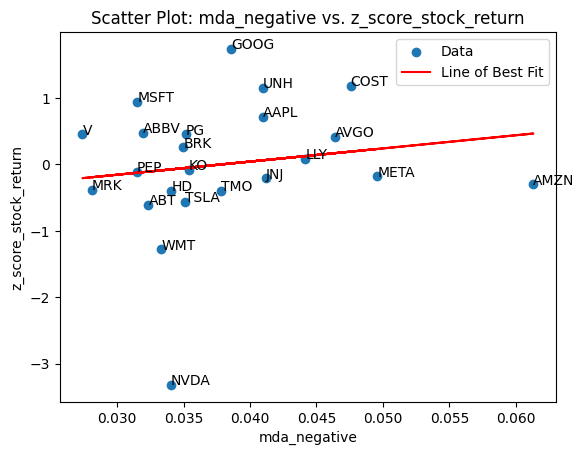

In [61]:
plot('mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.026
Model:                              OLS   Adj. R-squared:                 -0.020
Method:                   Least Squares   F-statistic:                    0.5627
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.461
Time:                          13:46:03   Log-Likelihood:                -31.820
No. Observations:                    23   AIC:                             67.64
Df Residuals:                        21   BIC:                             69.91
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1433      1.

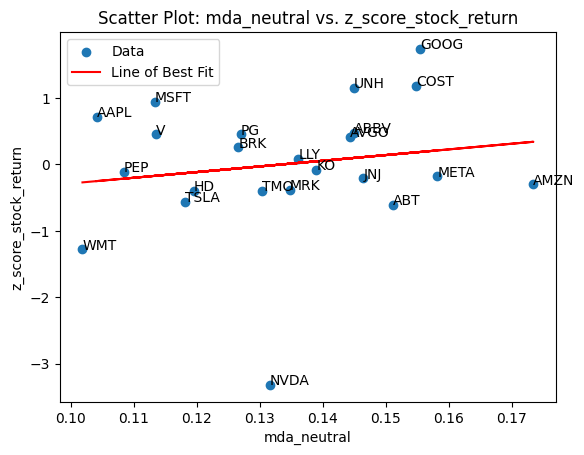

In [62]:
plot('mda_neutral', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.142
Model:                              OLS   Adj. R-squared:                  0.101
Method:                   Least Squares   F-statistic:                     3.472
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):             0.0764
Time:                          13:46:13   Log-Likelihood:                -30.365
No. Observations:                    23   AIC:                             64.73
Df Residuals:                        21   BIC:                             67.00
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.0057  

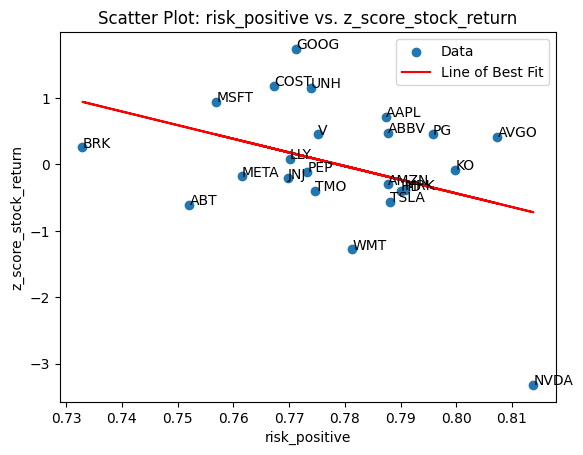

In [63]:
plot('risk_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.047
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.040
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.319
Time:                          13:46:29   Log-Likelihood:                -31.569
No. Observations:                    23   AIC:                             67.14
Df Residuals:                        21   BIC:                             69.41
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0518  

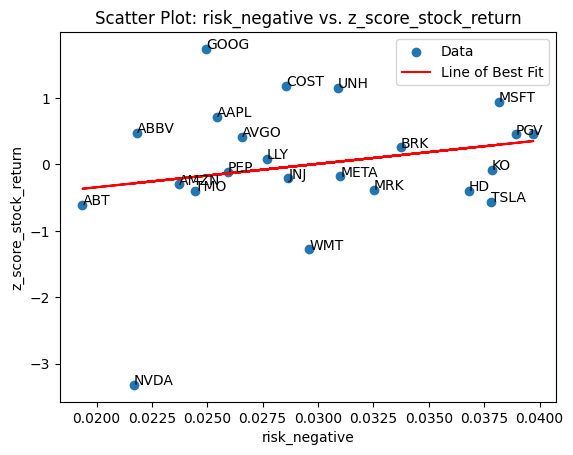

In [64]:
plot('risk_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.084
Model:                              OLS   Adj. R-squared:                  0.040
Method:                   Least Squares   F-statistic:                     1.925
Date:                  Sun, 04 Jun 2023   Prob (F-statistic):              0.180
Time:                          13:46:39   Log-Likelihood:                -31.116
No. Observations:                    23   AIC:                             66.23
Df Residuals:                        21   BIC:                             68.50
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.8896     

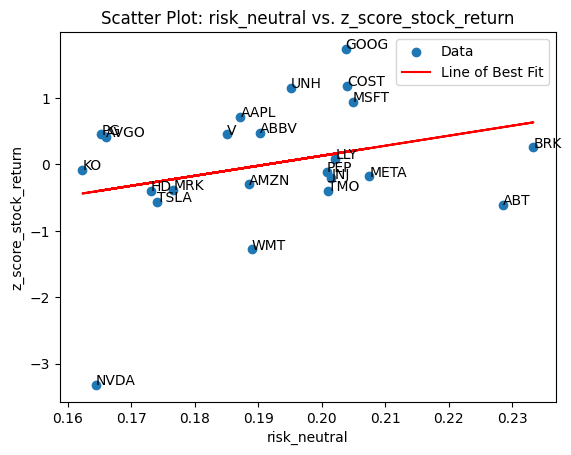

In [65]:
plot('risk_neutral', 'z_score_stock_return')

In [70]:
df_2020 = load_data('2020')
df_2021 = load_data('2021')
df_2022 = load_data('2022')

In [71]:
df_2020.describe()

,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return,z_score_stock_return
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.828183,0.037962,0.133856,0.778650,0.029819,0.191530,-0.010649,0.000000
std,0.024770,0.007849,0.018913,0.018325,0.006159,0.019205,0.056225,1.000000
min,0.765203,0.027381,0.101894,0.732931,0.019363,0.162354,-0.197331,-3.320284
25%,0.813238,0.032824,0.118876,0.769980,0.025189,0.175396,-0.032577,-0.389996
50%,0.831818,0.035164,0.134804,0.775175,0.028656,0.190362,-0.015184,-0.080660
75%,0.846558,0.041060,0.145708,0.789065,0.035272,0.202982,0.015282,0.461207
max,0.864802,0.061328,0.173469,0.813828,0.039723,0.233340,0.087092,1.738404


In [72]:
df_2021.describe()

,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return,z_score_stock_return
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.817774,0.038502,0.143724,0.785284,0.030439,0.184277,-0.000242,0.000000
std,0.021641,0.006671,0.016969,0.024557,0.007196,0.020883,0.075286,1.000000
min,0.783209,0.027373,0.109461,0.741489,0.020817,0.139777,-0.293901,-3.900603
25%,0.799040,0.033913,0.134059,0.766018,0.025468,0.169219,-0.013101,-0.170814
50%,0.817916,0.039453,0.146873,0.781812,0.029755,0.183900,0.009765,0.132913
75%,0.832086,0.043625,0.155758,0.807467,0.033365,0.198655,0.041696,0.557048
max,0.860709,0.054936,0.169533,0.830770,0.046017,0.224431,0.104058,1.385387


In [73]:
df_2022.describe()

,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return,z_score_stock_return
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01
mean,0.858429,0.024178,0.117393,0.805125,0.025418,0.169456,-0.001295,1.148507e-17
std,0.060702,0.010204,0.059173,0.062464,0.009666,0.057966,0.063288,1.000000e+00
min,0.745246,0.012416,0.028188,0.629694,0.013774,0.052720,-0.135506,-2.120628e+00
25%,0.820135,0.018364,0.069238,0.779952,0.019629,0.132274,-0.033547,-5.096032e-01
50%,0.856897,0.021245,0.118153,0.820178,0.021969,0.153620,-0.002519,-1.932713e-02
75%,0.908819,0.027249,0.150842,0.837648,0.030478,0.200057,0.013965,2.411229e-01
max,0.951018,0.061711,0.233756,0.922446,0.053933,0.321446,0.180907,2.878938e+00
